In [1]:
from pylab import np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [2]:
g = 9.8 # grav. acceleration [m/s^2]
L = 9.8 # pendulum length [m]
beta = 0.01 # damping constant [s^-1]
alpha = 0.0 # magnitude of driving force [N], 0.9, 1.07
omega_F = 1.0 # magnitude of driving force [s^-1]
print("natural freq.", np.sqrt(g/L))

natural freq. 1.0


In [3]:
Nsteps = 5000   # number of steps
Nperiods = 50. # number of oscillation peri
tau = 2.*np.pi*Nperiods/(omega_F*np.sqrt(g/L)) # time range in period units 
dt = tau/float(Nsteps-1) # time step [s]
t = np.linspace(0, tau, Nsteps) # Nx1 evenly spaced t_i time array
theta = np.zeros([Nsteps,2]) # Nx2 array (N rows, 2 columns) for y_i, v_i state

In [4]:
def rk4(y, t, dt, derivs): # rk4 method y_i -> y_i+1
    k1 = dt * derivs(y, t)
    k2 = dt * derivs(y + k1 / 2., t + dt / 2.)
    k3 = dt * derivs(y + k2 / 2., t + dt / 2.)
    k4 = dt * derivs(y + k3, t + dt)
    y_next = y + (k1 + 2.*k2 + 2.*k3 + k4) / 6.
    return y_next

In [5]:
def pendulum( y, t): 
    diff0 = y[1] # dtheta/dt = omega
    diff1 = -(g/L)*np.sin(y[0]) 
    diff1 -= 2.*beta*y[1] # domega/dt = −(g/L)*sin(theta)
    diff1 += alpha*np.cos(omega_F*t)
    return np.array([diff0, diff1])

In [6]:
theta_o = 0.1 # initial angle [radians] 
omega_o = 0.0 # inital angular velocity [rad/s]
theta[0,0] = theta_o
theta[0,1] = omega_o

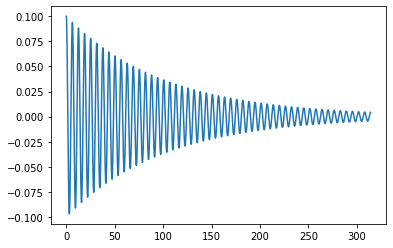

In [7]:
for j in range(Nsteps-1): # Loop over steps
    theta[j+1] = rk4(theta[j], t[j], dt, pendulum)
thetan = theta[:,0].copy()
omegan = theta[:,1].copy()
t1 = t[4000:]
theta1 = thetan[4000:]
omega1 = omegan[4000:]
t2 = t[4000:400]
theta2 = thetan[4000::400]
omega2 = omegan[4000::400]
plt.plot(t,thetan)

(0.0, 1.0)

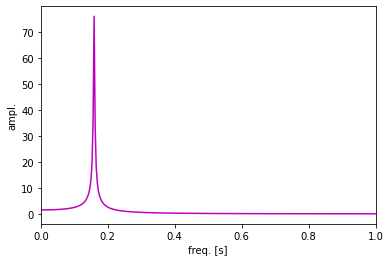

In [8]:
yf = fft(omegan)[:Nsteps//2]
xf = fftfreq(Nsteps, dt)[:Nsteps//2]
plt.plot(xf, np.abs(yf),"m",label="omega_o = 1.0")
plt.xlabel("freq. [s]")
plt.ylabel("ampl.")
plt.xlim(0.,1.)

Text(0, 0.5, 'ang. vel. [rad/s]')

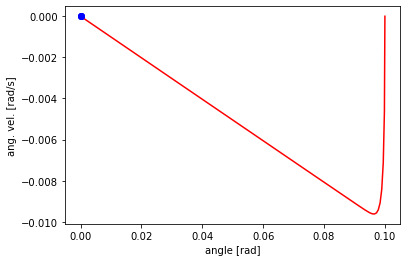

In [ ]:
plt.plot(thetan, omegan, "r")
plt.plot(theta2, omega2, "bo")
plt.xlabel ('angle [rad]')
plt.ylabel ('ang. vel. [rad/s]')

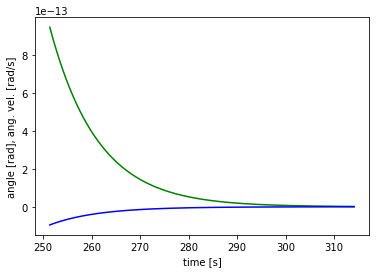

In [ ]:
plt.plot(t1, theta1, "g")
plt.plot(t1, omega1, "b")
plt.xlabel ('time [s]')
plt.ylabel ('angle [rad], ang. vel. [rad/s]')
N1 = theta1.size

# zero damping
g = 9.8 # grav. acceleration [m/s^2]
L = 9.8 # pendulum length [m]
beta = 0.0 # damping constant [s^-1]
alpha = 0.0 # magnitude of driving force [N], 0.9, 1.07
omega_F = 1. # magnitude of driving force [s^-1]

# under damping
g = 9.8 # grav. acceleration [m/s^2]
L = 9.8 # pendulum length [m]
beta = 0.05 # damping constant [s^-1]
alpha = 0.0 # magnitude of driving force [N], 0.9, 1.07
omega_F = 1. # magnitude of driving force [s^-1]

# critical damping
g = 9.8 # grav. acceleration [m/s^2]
L = 9.8 # pendulum length [m]
beta = 5.0 # damping constant [s^-1]
alpha = 0.0 # magnitude of driving force [N], 0.9, 1.07
omega_F = 1. # magnitude of driving force [s^-1]

# weak driving force
g = 9.8 # grav. acceleration [m/s^2]
L = 9.8 # pendulum length [m]
beta = 1./3. # damping constant [s^-1]
alpha = 0.1 # magnitude of driving force [N], 0.9, 1.07
omega_F = 2./3. # magnitude of driving force [s^-1]


# alpha=0.9 driving force
g = 9.8 # grav. acceleration [m/s^2]
L = 9.8 # pendulum length [m]
beta = 1./3. # damping constant [s^-1]
alpha = 0.1 # magnitude of driving force [N], 0.9, 1.07
omega_F = 2./3. # magnitude of driving force [s^-1]

# alpha=1.07 driving force
g = 9.8 # grav. acceleration [m/s^2]
L = 9.8 # pendulum length [m]
beta = 1./3. # damping constant [s^-1]
alpha = 1.07 # magnitude of driving force [N], 0.9, 1.07
omega_F = 2./3. # magnitude of driving force [s^-1]


